In [2]:
# Math Assignment

In [3]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/diabetes_binary_health_indicators_BRFSS2015.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np

x = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

matrix = x.to_numpy()
Y = y.to_numpy()

In [5]:
# 1. Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(matrix)

column_means = np.mean(standardized_data, axis=0)
print(column_means)

std_devs = np.std(standardized_data, axis=0)
print(std_devs)

[-1.25034010e-16  5.76993865e-17  1.24585860e-16 -2.50516171e-16
  2.68890345e-17 -4.03335517e-18  4.25743046e-18  5.37780689e-17
  5.60188218e-17 -2.48723569e-17  9.29912442e-17  4.48150574e-17
 -1.79260230e-17  1.71193519e-16  8.96301149e-18  3.45075942e-17
  2.55445827e-17  1.29963667e-16  6.76707367e-17 -8.51486091e-17
  7.17040919e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


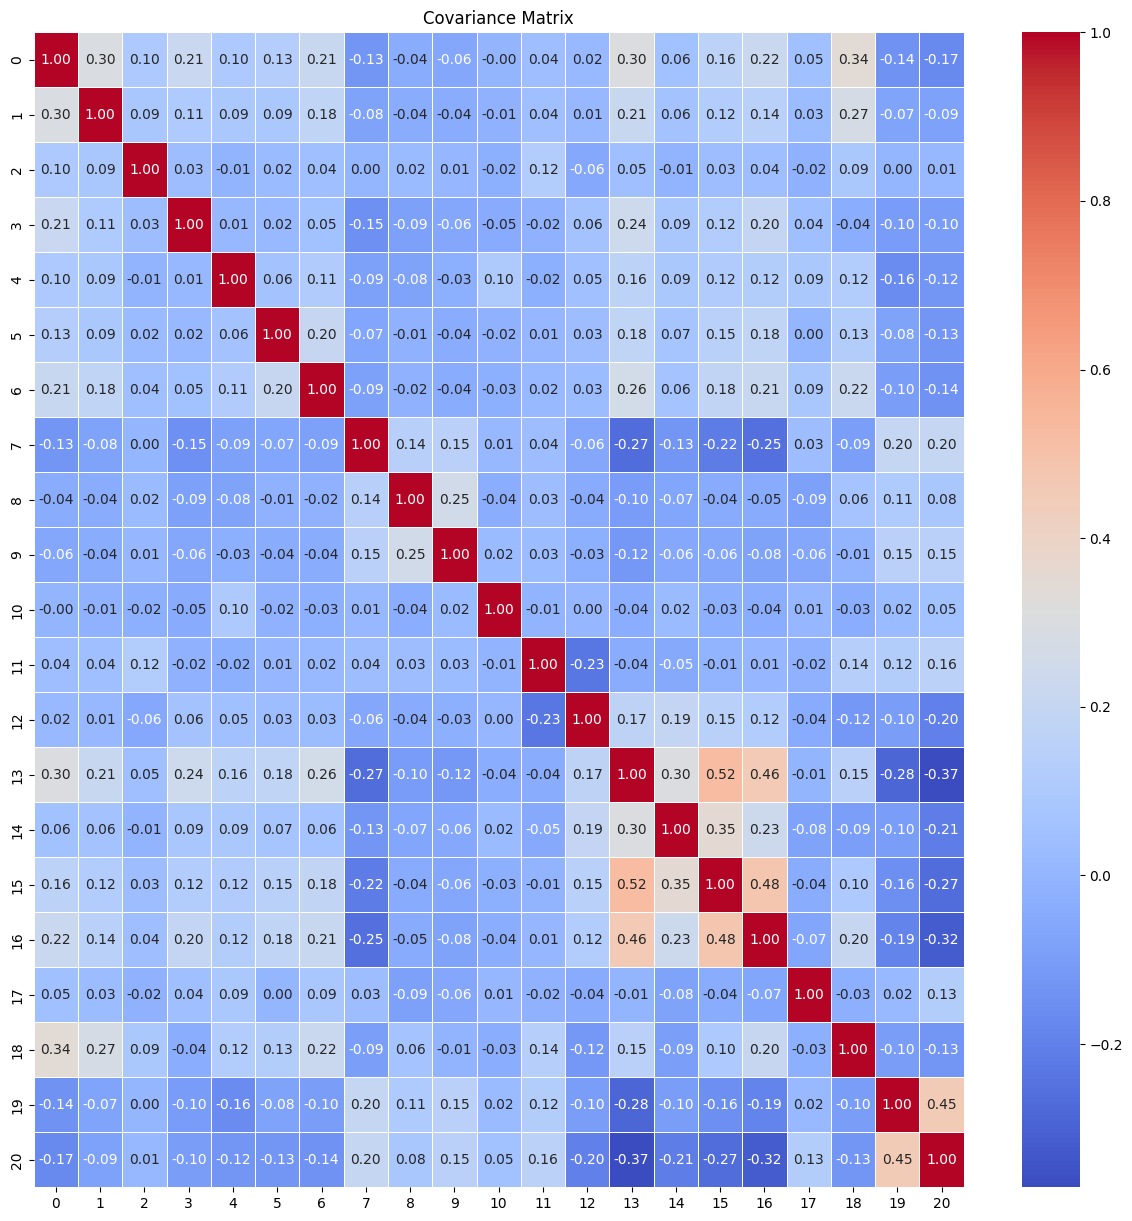

In [6]:
# 2. Covariance matrix

covariance_matrix = np.cov(standardized_data, rowvar=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix')
plt.show()

In [18]:
# 3. Diagonalization and Principal Components Selection

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

num_components = 10
eigenvalues_selected = eigenvalues_sorted[ :num_components]
eigenvectors_selected = eigenvectors_sorted[:, :num_components]
feature_vector = eigenvectors_selected

In [19]:
# 4. Reduced Dimensional Data
transformed_data = np.dot(standardized_data, eigenvectors_selected)

In [20]:
print(np.shape(matrix))
print(np.shape(transformed_data))

(253680, 21)
(253680, 10)


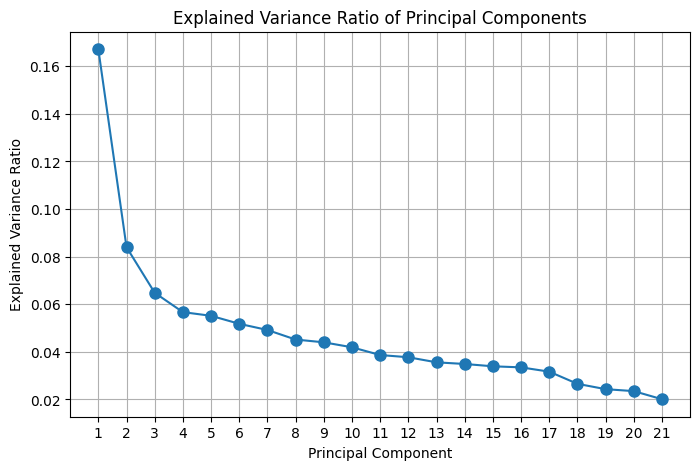

In [24]:
# explained variance ratio

explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(explained_variance_ratio)) + 1, explained_variance_ratio, 'o-', markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()


In [25]:
# Error Calculation

reconstructed_data = np.dot(transformed_data, eigenvectors_selected.T)
error = np.mean((standardized_data - reconstructed_data) ** 2)
print("Reconstruction Error: " , error)


Reconstruction Error:  0.34030789969586817
